In [ ]:
#Main Libraries
import numpy as np
from random import random, seed
import pandas as pd

#Pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Scikitlearn
import sklearn as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.linear_model import Ridge  
from sklearn.datasets import load_boston

#tqdm for cycle updates
from tqdm import tqdm


## Project 1

Omar Nasr 

Elia Pilotto

Lorenzo Domenichetti

Dorian da Cunha

In [ ]:
def R2(y_data, y_model):
  return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)



def plot_MSE_R2(MSE_train, MSE_test, R2_train, R2_test, yscalelog = [False, False], title = ['', ''], 
                xlabs = ['Degree', 'Degree'], save = False, name = "FrankePolyFit.pdf", 
                ylabs = ['MSE', 'R2']):
  fig, ax = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)

  ax[0].plot(MSE_train, label = 'train')
  ax[0].plot(MSE_test, label = 'test')
  if(yscalelog[0]):
    ax[0].set_yscale('log')
  ax[0].set_title(title[0])
  ax[0].set_xlabel(xlabs[0])
  ax[0].set_ylabel(ylabs[0])
  ax[0].legend()

  
  ax[1].plot(R2_train, label = 'train')
  ax[1].plot(R2_test, label = 'test')
  if(yscalelog[1]):
      ax[1].set_yscale('log')
  ax[1].set_title(title[1])
  ax[1].set_xlabel(xlabs[1])
  ax[1].set_ylabel(ylabs[1])
  ax[1].legend()

  if(save): plt.savefig("FrankePolyFit.pdf")
  plt.show()

def plot_2graph(x1, y1, label_y1, x2, y2, label_y2, yscalelog = [False, False], title = ['', ''], xlab = ['', ''], ylab = ['', '']):
  fig, ax = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)

  for plx, ply, lbl in zip(x1, y1, label_y1):
    ax[0].plot(plx, ply, label = lbl)
  if(yscalelog[0]):
    ax[0].set_yscale('log')
  ax[0].set_title(title[0])
  ax[0].set_xlabel(xlab[0])
  ax[0].set_ylabel(ylab[0])
  ax[0].legend()

  for plx, ply, lbl in zip(x2, y2, label_y2):
    ax[1].plot(plx, ply, label = lbl)
  if(yscalelog[1]):
      ax[1].set_yscale('log')
  ax[1].set_title(title[1])
  ax[1].set_xlabel(xlab[1])
  ax[1].set_ylabel(ylab[1])

  ax[1].legend()

  plt.savefig('Bias-Variance-toff.pdf')
  plt.show()


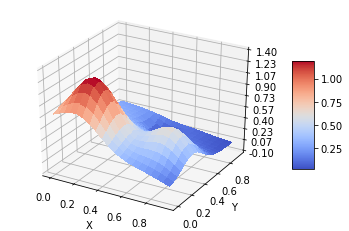

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x,y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

noise = 0.*np.random.randn(x.shape[0], x.shape[1])
z_ini = FrankeFunction(x, y) + noise

# Plot the surface.
surf = ax.plot_surface(x, y, z_ini, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("X ")
plt.ylabel("Y ")
#plt.zlabel("Z axis")
plt.savefig("FrankeFunction.pdf")
plt.show()



In [ ]:
# Make design matrix using Scikit-Learn.
x2 = np.arange(0, 1, 0.05)
y2 = np.arange(0, 1, 0.05)
X =  np.array([[np.array([i,j]) for i in x2] for j in y2]).reshape(400,2)
# 5 degree polynomial features (magic)
deg_of_poly = 5
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = pd.DataFrame(poly.fit_transform(X))

### MSE & R2 comparison
Compared error functions for different polynomials with different degrees. 

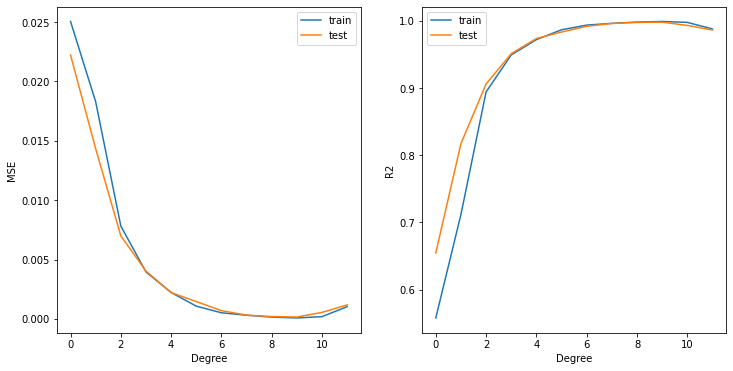

In [ ]:
degrees = np.arange(1,13)

MSEs_train_nonoise = []
MSEs_test_nonoise = []


R2s_train_nonoise = []
R2s_test_nonoise = []

target = z_ini.flatten()

for n_degree in degrees:
  features = []
  for degree in range(n_degree+1):
      for i in range(degree+1):
          features.append( ((y**i)*(x**(degree-i))).flatten() )

  df = pd.DataFrame(data = features).T

  X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.1, random_state = 1 )
  # matrix inversion to find beta
  beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
  # and then make the prediction
  ytilde = X_train @ beta
  
  ypredict = X_test @ beta

  MSEs_train_nonoise.append(sum((ytilde - y_train)**2)/len(y_train))
  MSEs_test_nonoise.append(sum((ypredict - y_test)**2)/len(y_test))

  R2s_train_nonoise.append(R2(ytilde, y_train))
  R2s_test_nonoise.append(R2(ypredict, y_test))


# plot_MSE_R2(MSEs_train_nonoise, MSEs_test_nonoise, R2s_train_nonoise, R2s_test_nonoise, [False, False], title=['MSE train vs test', 'R2 train vs test'], save = True,)
plot_MSE_R2(MSEs_train_nonoise, MSEs_test_nonoise, R2s_train_nonoise, R2s_test_nonoise, [False, False], title=['', ''], save = True,)

### Noise added

Added 10 different values of noise - in terms of standard deviations. Compared in the end the best test scores after fitting with polynomial curves with 10 different degrees.

In [ ]:
noise_values = np.arange(0,1,0.1)
# degrees = np.arange(1,10)
degrees = [8]

MSEs_train_best = []
R2s_train_best = []
MSEs_test_best = []
R2s_test_best = []

for noise_val in noise_values:
  noise = noise_val*np.random.randn(x.shape[0], x.shape[1])
  z = FrankeFunction(x, y) + noise

  target = z.flatten()
  

  MSEs_train = []
  MSEs_test = []

  R2s_train = []
  R2s_test = []

  for n_degree in degrees:
    features = []
    for degree in range(n_degree+1):
        for i in range(degree+1):
            features.append( ((y**i)*(x**(degree-i))).flatten() )

    df = pd.DataFrame(data = features).T

    X_train, X_test, y_train, y_test = train_test_split(df, target , test_size=0.2, random_state = 1 )
    # matrix inversion to find beta
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    # and then make the prediction
    ytilde = X_train @ beta
    
    ypredict = X_test @ beta

    MSEs_train.append(sum((ytilde - y_train)**2)/len(y_train))
    MSEs_test.append(sum((ypredict - y_test)**2)/len(y_test))

    R2s_train.append(R2(ytilde, y_train))
    R2s_test.append(R2(ypredict, y_test))

  
  MSEs_train_best.append(min(MSEs_train))
  R2s_train_best.append(max(R2s_train))
  MSEs_test_best.append(min(MSEs_test))
  R2s_test_best.append(max(R2s_test))


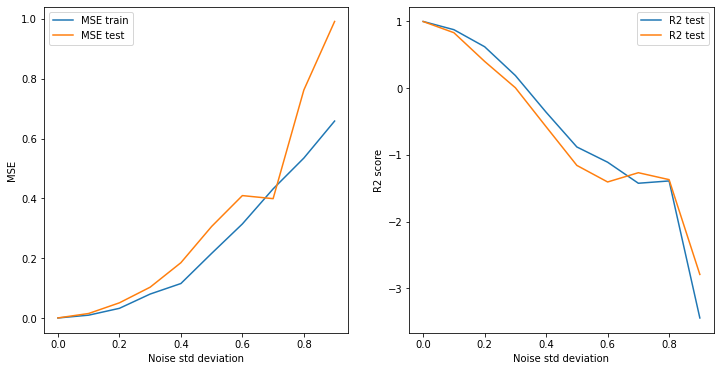

In [ ]:
  fig, ax = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)

  ax[0].plot(noise_values, MSEs_train_best, label = 'MSE train')
  ax[0].plot(noise_values, MSEs_test_best, label = 'MSE test')
  # ax[0].set_title('MSE vs noise')
  ax[0].set_xlabel('Noise std deviation')
  ax[0].set_ylabel('MSE')

  ax[0].legend()

  ax[1].plot(noise_values, R2s_train_best, label = 'R2 test')
  ax[1].plot(noise_values, R2s_test_best, label = 'R2 test')

  # ax[1].set_title('R2 vs noise')
  ax[1].set_xlabel('Noise std deviation')
  ax[1].set_ylabel('R2 score')
  ax[1].legend()
  plt.savefig("FrankeNoise.pdf")
  plt.show()

### Noise values and beta variances


Computed and plot the variances for the beta paremeters. Fixed a single poly degree (5 in our case). The variances scale as $\sigma ^2$ as expected. 

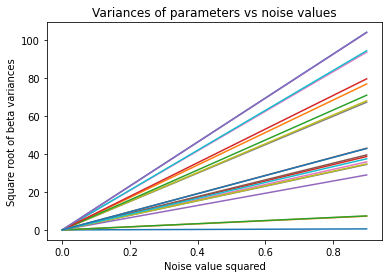

In [ ]:
noise_values = np.arange(0,1,0.1)

beta_variances = []

for noise_val in noise_values:
  noise = noise_val*np.random.randn(x.shape[0], x.shape[1])
  z = FrankeFunction(x, y) + noise

  target = z.flatten()

  MSEs_train = []
  MSEs_test = []


  R2s_train = []
  R2s_test = []

  n_degree = 5

  features = []
  for degree in range(n_degree+1):
      for i in range(degree+1):
          features.append( ((y**i)*(x**(degree-i))).flatten() )

  df = pd.DataFrame(data = features).T

  X_train, X_test, y_train, y_test = train_test_split(df, target , test_size=0.1, random_state = 1)
  # matrix inversion to find beta
  beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
  # and then make the prediction
  ytilde = X_train @ beta
  
  ypredict = X_test @ beta


  beta_var = np.diag(noise_val**2 * np.linalg.inv(X_train.T @ X_train))

  beta_variances.append(beta_var)


for j in range(21):
  plt.plot(noise_values, [np.sqrt(i[j]) for i in beta_variances] )
plt.xlabel('Noise value squared')
plt.ylabel('Square root of beta variances')
plt.title('Variances of parameters vs noise values')
plt.show()

### Scaling and splitting


Data are in this section rescaled and are always kept rescaled (mean = 0 and variance = 1). (We exploit the scikit-learn StandardScaler().)

In the presented case, there are no differences in the output results while comparing the train and test data in the rescaled and in the non-rescaled case. 

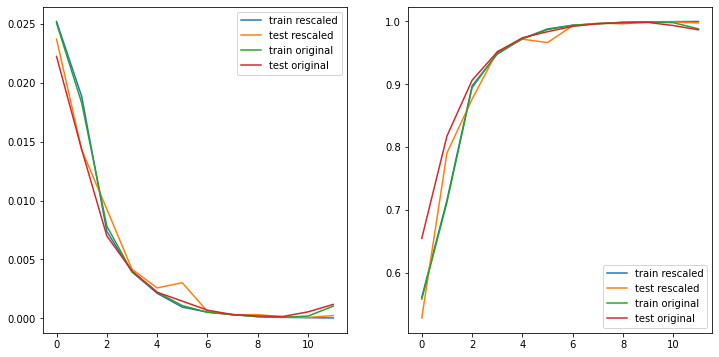

In [ ]:
#noise_val = 0
#noise = noise_val*np.random.randn(x.shape[0], x.shape[1])
#z = FrankeFunction(x, y) + noise

degrees = np.arange(1,13)

MSEs_train_resc = []
MSEs_test_resc = []


R2s_train_resc = []
R2s_test_resc = []

target = z_ini.flatten()

for n_degree in degrees:
  features = []
  for degree in range(1, n_degree+1):
    for i in range(degree+1):
        features.append( ((y**i)*(x**(degree-i))).flatten())

  df = pd.DataFrame(data = features).T
  
  X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

  #using scaler to fit the rescaling on the train data (calculate means and stdvs) and then apply the transformation to the train data.
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train_sc = scaler.transform(X_train)
  X_test_sc  = scaler.transform(X_test)

  y_train_scaled = y_train - np.array(y_train).mean()

  # matrix inversion to find beta
  beta = np.linalg.pinv(X_train_sc.T @ X_train_sc) @ X_train_sc.T @ y_train_scaled
  # and then make the prediction
  ytilde   = X_train_sc @ beta + np.array(y_train).mean()
  
  ypredict = X_test_sc @ beta + np.array(y_train).mean()

  MSEs_train_resc.append(sum((ytilde -  y_train)**2)/len(y_train))
  MSEs_test_resc.append(sum((ypredict - y_test)**2)/len(y_test))

  R2s_train_resc.append(R2(ytilde, y_train))
  R2s_test_resc.append(R2(ypredict, y_test))




fig, ax = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)

#ax[0].plot(MSEs_best, label = 'MSE')
#ax[0].set_title('MSE vs poly degree')
#ax[0].legend()
#
#ax[1].plot(R2s_best, label = 'R2')
#ax[1].set_title('R2 vs poly degree')
#ax[1].legend()
#
#plt.show()

ax[0].plot(MSEs_train_resc, label = 'train rescaled')
ax[0].plot(MSEs_test_resc, label = 'test rescaled')
ax[0].plot(MSEs_train_nonoise, label = 'train original')
ax[0].plot(MSEs_test_nonoise, label = 'test original')
ax[0].legend()

ax[1].plot(R2s_train_resc, label = 'train rescaled')
ax[1].plot(R2s_test_resc, label = 'test rescaled')
ax[1].plot(R2s_train_nonoise, label = 'train original')
ax[1].plot(R2s_test_nonoise, label = 'test original')
ax[1].legend()
plt.show()

### Bias-Variance tradeoff 

Let's now try to reproduce a figure similar to the 2.11 proposed in the textbook. 

Let's consider a very high number of degrees for the polynomials and take even less data for training. With only 20% of the data in training, the algorithm goes strongly overfitting, as the algorithm learns at perfectly the data from the training set. In the MSE graph, a log-y axis is necessary to display the full curve as the overfitting gets too strong with polynomials with too high degrees. 

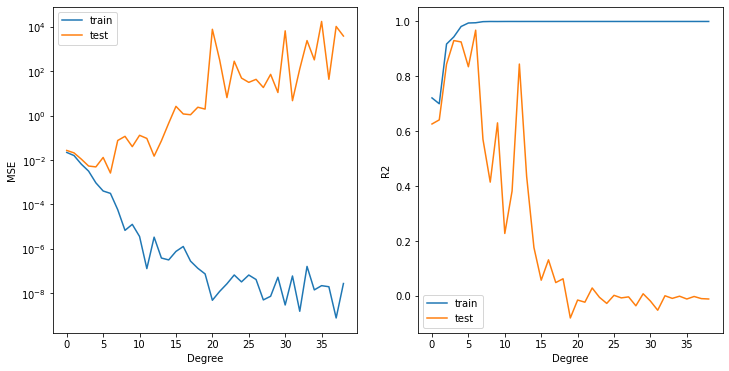

In [ ]:
noise_val = 3
noise = noise_val*np.random.randn(x.shape[0], x.shape[1])
z = FrankeFunction(x, y) + noise

degrees = np.arange(1,40)

MSEs_train_resc = []
MSEs_test_resc = []


R2s_train_resc = []
R2s_test_resc = []

for n_degree in degrees:
  features = []
  for degree in range(1, n_degree+1):
      for i in range(degree+1):
          features.append( ((y**i)*(x**(degree-i))).flatten())

  df = pd.DataFrame(data = features).T

  X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8)
  
  #using scaler to fit the rescaling on the train data (calculate means and stdvs) and then apply the transformation to the train data.
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train_sc = scaler.transform(X_train)
  X_test_sc  = scaler.transform(X_test)
  y_train_scaled = y_train - np.array(y_train).mean()

  # matrix inversion to find beta
  beta = np.linalg.pinv(X_train_sc.T @ X_train_sc) @ X_train_sc.T @ y_train_scaled
  # and then make the prediction
  ytilde   = X_train_sc @ beta + np.array(y_train).mean()
  
  ypredict = X_test_sc @ beta + np.array(y_train).mean()

  MSEs_train_resc.append(sum((ytilde -  y_train)**2)/len(y_train))
  MSEs_test_resc.append(sum((ypredict - y_test)**2)/len(y_test))

  R2s_train_resc.append(R2(ytilde, y_train))
  R2s_test_resc.append(R2(ypredict, y_test))


plot_MSE_R2(MSEs_train_resc, MSEs_test_resc, R2s_train_resc, R2s_test_resc, [True, False])

Show that you can rewrite this 

$$ C(X,\beta)=\frac{1}{n}\sum_{i=0}^{n−1}(y_i−\widetilde{y}_i)^2=\mathbb{E}[(y−\widetilde{y})^2]. $$

as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$


DIM: 

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right] = 
\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right]  = 
\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right] = 
$$


$$
\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right] + \mathbb{E}\left[(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right] + \sigma^2 = 
$$


$$
\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right] + Var(\boldsymbol{\tilde{y}}) + \sigma^2 
$$

Exploiting the fact that $Var(\epsilon)$  $ = \mathbb{E}\left[\boldsymbol{\epsilon}^2\right] - \left(\mathbb{E}\left[\boldsymbol{\epsilon}\right]\right)^2 = \mathbb{E}\left[\boldsymbol{\epsilon}^2\right]$


The first term is the bias of the model squared - i.e. the bias between the learning model and the data. Such value reflects the simplifications introduced in the model - typically, a simpler model has a high bias due to the assumption taken into consideration. The second term is instad related to the variance of the model - its dispersion - while the last one is the variance of the noise introduced in the data.


## Bias-Variance tradeoff analysis

Perform then a bias-variance analysis of the Franke function by studying the MSE value as function of the complexity of your model. Plot the bias and variance trade-off, and evaluate how it depends on your model complexity, the number of data points, and possibly also the noise parameter.

Note also that when you calculate the bias, in all applications you don't know the function values fi
. You would hence replace them with the actual data points yi. 



In the following cell, we study both how the bias variance tradeoff changes accorging to the complexity of the model (i.e. the degree of the polynomial) and the datasize (we keep fixed the number of points simulated and we modify the percentage of data in the test set) - such procedure efficiently tackes the problem of studying how the learning data affect the ratio between variance and bias.

As the graph for the degree shows, as the complexity of the model increase the model itself tends to be more and more precise in term of bias but the too many degrees of freedom introduces bring also to a large variability on the inferred data - an effect most probably related to overfitting. 

Moreover, such a behaviour is reproduced also in the second case, in which the variable considered is the percentage of the dataset inside the test set. 
In this case, when the algorithm has the most data over which it can train on, the bias is the largest source of error - the algorithm produces more or less the same output and the approximations introduced are related to the bias. On the other hand, when the test set is large (0.8 or 0.9), the number of training point is relatively little and the algorithm learns the position of the points. Such feature brings in an enormous variability for the predicted data, once more related to overfitting. 

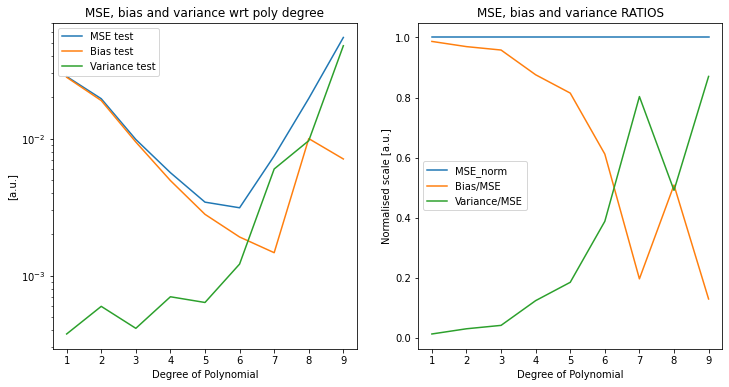

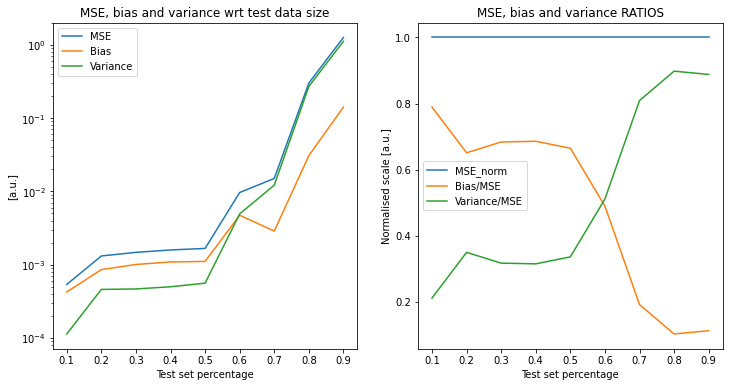

In [ ]:
n_boostraps = 100
degrees = np.arange(1,10)


## code for changing degree of Poly fitted
MSEs_test_bias = np.zeros(len(degrees))
biases_test = np.zeros(len(degrees))
variances_test = np.zeros(len(degrees))

data = [[i,j] for i,j in zip(x.flatten(),y.flatten())]

X_train, X_test, y_train, y_test = train_test_split(data, z_ini.flatten(), test_size=0.5, random_state = 42)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.zeros([y_train.shape[0], n_boostraps])
    for i in range(n_boostraps):
        x_resampled, y_resampled = resample(X_train, y_train)
        y_pred[:, i] = model.fit(x_resampled, y_resampled).predict(X_test)

    y_test = y_test.reshape(y_test.shape[0],1)
    MSEs_test_bias[degree-1] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    biases_test[degree-1] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variances_test[degree-1] = np.mean( np.var(y_pred, axis=1, keepdims=True) )



plot_2graph([degrees]*3, [MSEs_test_bias, biases_test, variances_test], ["MSE test", "Bias test", "Variance test"],
            [degrees]*3, [MSEs_test_bias/MSEs_test_bias, biases_test/MSEs_test_bias, variances_test/MSEs_test_bias],  ["MSE_norm", "Bias/MSE", "Variance/MSE"],
            [True, False], ['MSE, bias and variance wrt poly degree', 'MSE, bias and variance RATIOS'], 
            ['Degree of Polynomial']*2, ['[a.u.]', 'Normalised scale [a.u.]'])


## FIX poly degree to 7 and change percentage of data in the training set. 

fixed_degree = 7
n_boostraps = 100
percentages = np.arange(0.1,1,0.1)
MSEs_test_bias_ndata = np.zeros(len(percentages))
biases_test_ndata = np.zeros(len(percentages))
variances_test_ndata = np.zeros(len(percentages))

for it, perc in enumerate(percentages):

  X_train, X_test, y_train, y_test = train_test_split(data, z_ini.flatten(), test_size=perc)

  model = make_pipeline(PolynomialFeatures(degree=fixed_degree), LinearRegression(fit_intercept=False))
  y_pred = np.zeros([y_test.shape[0], n_boostraps])
  for i in range(n_boostraps):
      x_resampled, y_resampled = resample(X_train, y_train)
      y_pred[:, i] = model.fit(x_resampled, y_resampled).predict(X_test)

  y_test = y_test.reshape(y_test.shape[0],1)
  MSEs_test_bias_ndata[it] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
  biases_test_ndata[it] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
  variances_test_ndata[it] = np.mean( np.var(y_pred, axis=1, keepdims=True) )


plot_2graph([percentages]*3, [MSEs_test_bias_ndata, biases_test_ndata, variances_test_ndata], ["MSE", "Bias", "Variance"],
            [percentages]*3, [MSEs_test_bias_ndata/MSEs_test_bias_ndata, biases_test_ndata/MSEs_test_bias_ndata, variances_test_ndata/MSEs_test_bias_ndata],  ["MSE_norm", "Bias/MSE", "Variance/MSE"],
            [True, False], ['MSE, bias and variance wrt test data size', 'MSE, bias and variance RATIOS'], 
            ['Test set percentage']*2, ['[a.u.]', 'Normalised scale [a.u.]']) 

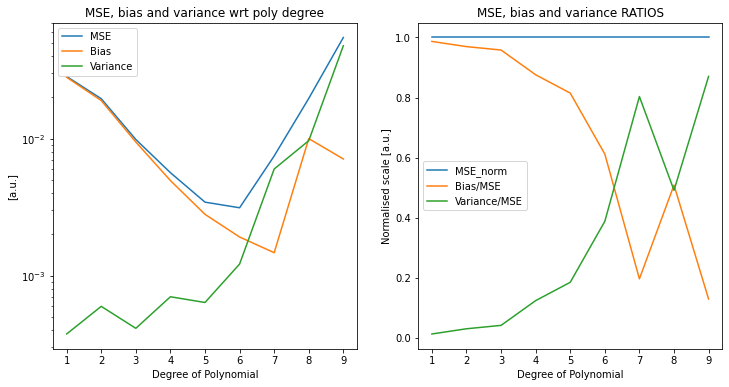

In [ ]:
plot_2graph([degrees]*3, [MSEs_test_bias, biases_test, variances_test], ["MSE", "Bias", "Variance"],
            [degrees]*3, [MSEs_test_bias/MSEs_test_bias, biases_test/MSEs_test_bias, variances_test/MSEs_test_bias],  ["MSE_norm", "Bias/MSE", "Variance/MSE"],
            [True, False], ['MSE, bias and variance wrt poly degree', 'MSE, bias and variance RATIOS'], 
            ['Degree of Polynomial']*2, ['[a.u.]', 'Normalised scale [a.u.]'])

The following cell is dedicated to study the Bias-Variance tradeoff **while changing the noise parameter**.

The cell still has to be checked - the implementation is very similar to what has been done before, but showing how the noise parameter affects the bias-v tradeoff is not so easy. In particular, the difference between two very large numbers is not precise enough to yield the value we would expect.

It is anyhow interesting to see that the bias/variance ratio remains almost constant for all the noise values. What should change is the differnece beween the MSError and the sum of bias and variance. Probably the value of sigma is too small and the subtraction gives precision errors. 

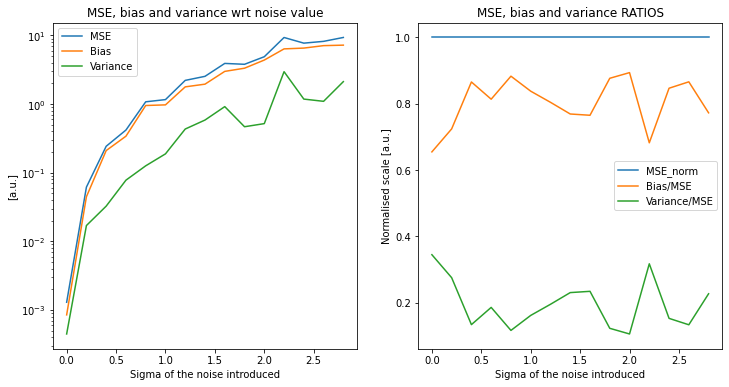

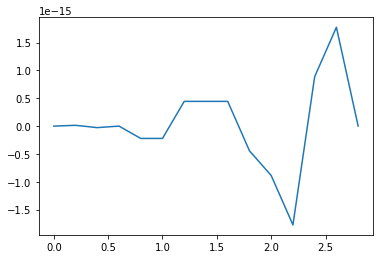

In [ ]:
noises = np.arange(0,3,0.2)

## fix degree at 7 and test_size at 0.3
n_boostraps = 100
fixed_degree = 7
fixed_testsize = 0.3
MSEs_test_bias_noise = np.zeros(len(noises))
biases_test_noise = np.zeros(len(noises))
variances_test_noise = np.zeros(len(noises))
sigmas = np.zeros(len(noises))


data = [[i,j] for i,j in zip(x.flatten(),y.flatten())]


for it, noise_val in enumerate(noises):

  noise = noise_val*np.random.randn(x.shape[0], x.shape[1])
  X_train, X_test, y_train, y_test = train_test_split(data, (z_ini + noise).flatten(), test_size=0.3)

  model = make_pipeline(PolynomialFeatures(degree=fixed_degree), LinearRegression(fit_intercept=False))
  y_pred = np.zeros([y_test.shape[0], n_boostraps])
  for i in range(n_boostraps):
      x_resampled, y_resampled = resample(X_train, y_train)
      y_pred[:, i] = model.fit(x_resampled, y_resampled).predict(X_test)

  y_test = y_test.reshape(y_test.shape[0],1)
  MSEs_test_bias_noise[it] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
  biases_test_noise[it] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
  variances_test_noise[it] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

  sigmas[it] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) ) - (np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )+np.mean( np.var(y_pred, axis=1, keepdims=True) ))


plot_2graph([noises]*3, [MSEs_test_bias_noise, biases_test_noise, variances_test_noise], ["MSE", "Bias", "Variance"],
            [noises]*3, [MSEs_test_bias_noise/MSEs_test_bias_noise, biases_test_noise/MSEs_test_bias_noise, variances_test_noise/MSEs_test_bias_noise],  ["MSE_norm", "Bias/MSE", "Variance/MSE"],
            [True, False], ['MSE, bias and variance wrt noise value', 'MSE, bias and variance RATIOS'], 
            ['Sigma of the noise introduced']*2, ['[a.u.]', 'Normalised scale [a.u.]'])

#the difference is very close to zero and there are no specific trends in the graph.. has to be revised.
plt.plot(noises, sigmas)


### Part c) Cross-validation as resampling techniques, adding more complexity
The aim here is to study another widely popular resampling technique, the so-called cross-validation method.

Before you start with the cross-validation approach, you should assess whether you should scale your data before the whole procedure, or during the procedure inbetween each split. This issue is relevant to the topic of data leakage.

The data should be rescaled **after** each new training set is built. Such procedure would imitate the same procedure which is followed during the common training phase, when no cross validation is employed. 

Implement the k-fold cross-validation algorithm and evaluate again the MSE function resulting from the test folds. You can use the functionality of Scikit-Learn or even write your own code. Try 5−10 folds, comment on your results.

Compare the MSE you get from your cross-validation code with the one you got from your bootstrap code. Comment your results.

---*** --- *** --- *** --- *** 

In general, resampling techniques have accuracy values that are more stable. Comparing both bootstap and cv to the single-fold scores, we can notice the lack of spices even running thw following cell multiple times. 
Moreover, a larger difference is always found between the cv and the single-fold case for smaller number of CVs (5 for example). In this case, the amount of data used for training changed from 80% to 90%. The increase in stability seen as the number of CV grows may then be related to the higher number of data used in the training phase. 

Among all the curves shown, boostrap always reaches the best MSE. Such behaviour is justified by the number of data that are taken into consideration in the training phase. While resampling many times, the results tend to be more stable and also lower, as the variations introduced by the possible presence of outliers may be smoothed out and kept under control. 


In [ ]:
from sklearn.model_selection import cross_val_score

degrees = np.arange(1,10)
X_total = data
y_total = z_ini.flatten()

MSE_CrossValidation_mean = []
MSE_SingleCV = []

for cv_i in range(5,11):
  scores_per_cv = []
  scores_single_cv = []
  for i in degrees:    
      model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression(fit_intercept=False))
      
      # Evaluate the models using crossvalidation
      scores = cross_val_score(model, X_total, y_total,   cv=cv_i, scoring = 'neg_mean_squared_error') #scoring="mean_squared_error", 
      scores_per_cv.append(-1*scores.mean())
      # scores_single_cv.append(-1*scores[np.random.randint(0,len(scores))])
      scores_single_cv.append(-1*scores[0])


  MSE_CrossValidation_mean.append(scores_per_cv)
  MSE_SingleCV.append(scores_single_cv)



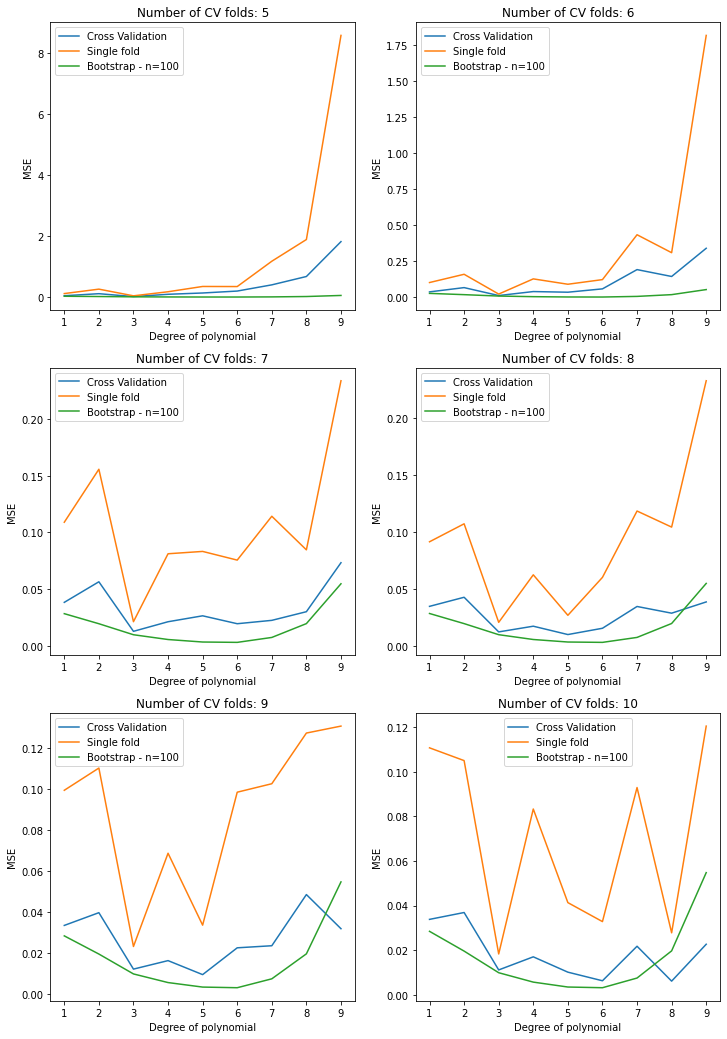

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (12,18))

for i, MSE_cv, MSE_onefold, ax_i in zip(range(5,11), MSE_CrossValidation_mean, MSE_SingleCV, np.array(ax).flatten()):

  ax_i.plot(degrees, MSE_cv, label = 'Cross Validation')
  ax_i.plot(degrees, MSE_onefold, label = 'Single fold')
  ax_i.plot(degrees, MSEs_test_bias[:len(degrees)], label = 'Bootstrap - n=100')

  ax_i.set_title("Number of CV folds: "+str(i))
  ax_i.set_xlabel("Degree of polynomial")
  ax_i.set_ylabel("MSE")
  #ax_i.set_yscale('log')
  ax_i.legend()

plt.savefig("Kfold-bootstrapComparison.pdf")
plt.show()

### Part d): Ridge Regression on the Franke function with resampling
We will now use Ridge regression. You can use the Scikit-Learn functionality or write your own code.

Perform the same bootstrap analysis as in the part b) (for the same polynomials) and the cross-validation part in part c) but now for different values of λ. Compare and analyze your results with those obtained in parts a-c). Study the dependence on λ.

Study also the bias-variance trade-off as function of various values of the parameter λ. For the bias-variance trade-off, use the bootstrap resampling method. Comment your results.


In the case of the Bootstrap, we observe that if the lambda value is too high then the bias takes most part of the MSE. this means that the fit goes for a too simple model, which is not able to reproduce the trend of the data. On the other hand, if the value of lambda is low enough, then we can spot the same behaviour observed in the previous OLS case. 

In [ ]:
n_boostraps = 100
degrees = np.arange(1,10)


## code for changing degree of Poly fitted
MSEs_ridge_boot = []
biases_ridge_boot = []
variances_ridge_boot = []

data = [[i,j] for i,j in zip(x.flatten(),y.flatten())]

X_train, X_test, y_train, y_test = train_test_split(data, z_ini.flatten(), test_size=0.5, random_state = 42)


lambdas = np.logspace(-6, 2, 9)

lambdas =  [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

for lam in lambdas: 
  MSE_lam = np.zeros(len(degrees))
  bias_lam = np.zeros(len(degrees))
  var_lam = np.zeros(len(degrees))
  for degree in degrees:
      model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha = lam, fit_intercept=True))
      y_pred = np.zeros([y_train.shape[0], n_boostraps])
      for i in range(n_boostraps):
          x_resampled, y_resampled = resample(X_train, y_train)
          y_pred[:, i] = model.fit(x_resampled, y_resampled).predict(X_test)

      y_test = y_test.reshape(y_test.shape[0],1)
      MSE_lam[degree-1] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
      bias_lam[degree-1] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
      var_lam[degree-1] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    
  MSEs_ridge_boot.append(MSE_lam)
  biases_ridge_boot.append(bias_lam)
  variances_ridge_boot.append(var_lam)

# plot_2graph([degrees]*3, [MSEs_test_bias, biases_test, variances_test], ["MSE", "Bias", "Variance"],

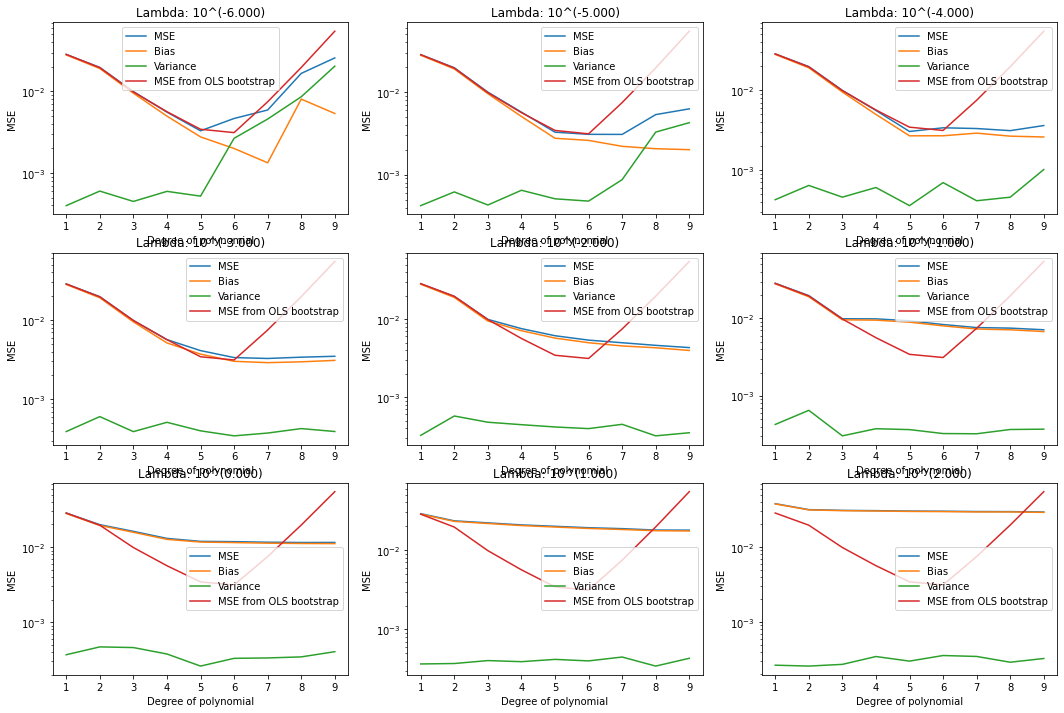

In [ ]:
l_plt = [MSEs_ridge_boot, biases_ridge_boot, variances_ridge_boot]

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (18,12))

for i, powers, ax_i in zip(range(9), range(-6,3), np.array(ax).flatten()):

  
  # l_plt = [MSEs_ridge_boot, biases_ridge_boot, variances_ridge_boot]
  ax_i.plot(degrees, l_plt[0][i], label = 'MSE')
  ax_i.plot(degrees, l_plt[1][i], label = 'Bias')
  ax_i.plot(degrees, l_plt[2][i], label = 'Variance')
  ax_i.plot(degrees[:], MSEs_test_bias, label = 'MSE from OLS bootstrap')

  ax_i.set_title("Lambda: 10^("+f"{powers:.3f})")
  ax_i.set_xlabel("Degree of polynomial")
  ax_i.set_ylabel("MSE")
  ax_i.set_yscale('log')
  ax_i.legend()

plt.savefig("Coma")
plt.show()

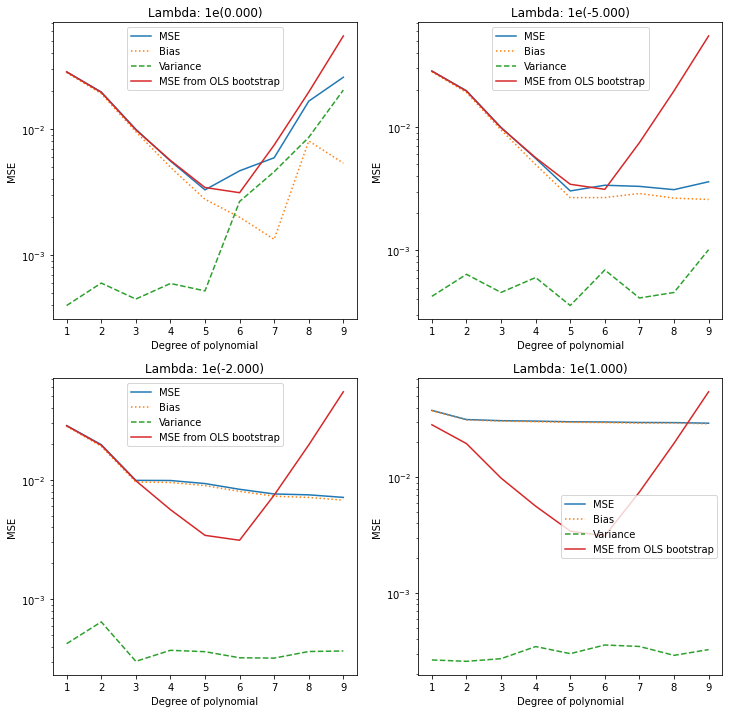

In [ ]:
l_plt = [MSEs_ridge_boot, biases_ridge_boot, variances_ridge_boot]

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

titles_pow = [0, -5, -2, 1]
for i, powers, ax_i in zip([0, 2, 5, 8], titles_pow, np.array(ax).flatten()):

  
  # l_plt = [MSEs_ridge_boot, biases_ridge_boot, variances_ridge_boot]
  ax_i.plot(degrees, l_plt[0][i], label = 'MSE')
  ax_i.plot(degrees, l_plt[1][i], label = 'Bias', linestyle = 'dotted')
  ax_i.plot(degrees, l_plt[2][i], label = 'Variance', linestyle = 'dashed')
  ax_i.plot(degrees[:], MSEs_test_bias, label = 'MSE from OLS bootstrap')

  ax_i.set_title("Lambda: 1e("+f"{powers:.3f})")
  ax_i.set_xlabel("Degree of polynomial")
  ax_i.set_ylabel("MSE")
  ax_i.set_yscale('log')
  ax_i.legend()

plt.savefig("ComparisonRidge - 9 Degrees.pdf")
plt.show()

### Ridge and CrossValidation


Let's now consider the Ridge regression coupled with CrossValidation. 


STILL TODO!!!!! 

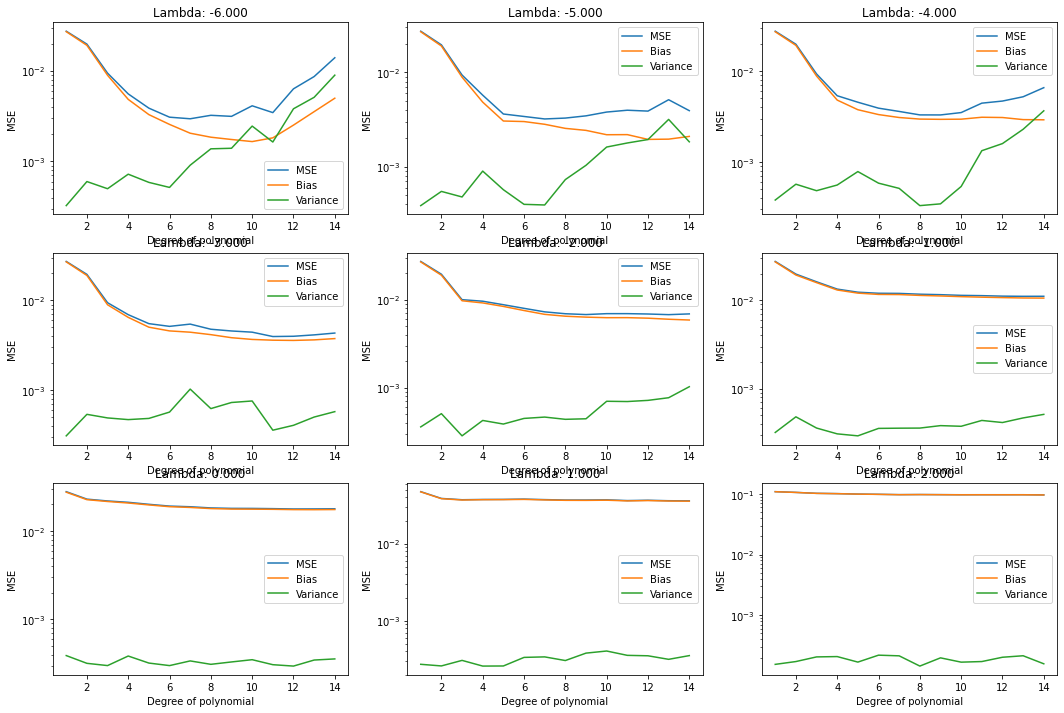

In [ ]:
n_boostraps = 100
degrees = np.arange(1,15)


## code for changing degree of Poly fitted
MSEs_ridge_boot = []
biases_ridge_boot = []
variances_ridge_boot = []

data = [[i,j] for i,j in zip(x.flatten(),y.flatten())]

X_train, X_test, y_train, y_test = train_test_split(data, z_ini.flatten(), test_size=0.5)


lambdas = np.logspace(-6, 2, 9)

for lam in lambdas: 
  MSE_lam = np.zeros(len(degrees))
  bias_lam = np.zeros(len(degrees))
  var_lam = np.zeros(len(degrees))
  for degree in degrees:
      model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha = lam, fit_intercept=False))
      y_pred = np.zeros([y_train.shape[0], n_boostraps])
      for i in range(n_boostraps):
          x_resampled, y_resampled = resample(X_train, y_train)
          y_pred[:, i] = model.fit(x_resampled, y_resampled).predict(X_test)

      y_test = y_test.reshape(y_test.shape[0],1)
      MSE_lam[degree-1] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
      bias_lam[degree-1] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
      var_lam[degree-1] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    
  MSEs_ridge_boot.append(MSE_lam)
  biases_ridge_boot.append(bias_lam)
  variances_ridge_boot.append(var_lam)

l_plt = [MSEs_ridge_boot, biases_ridge_boot, variances_ridge_boot]

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (18,12))

for i, powers, ax_i in zip(range(9), range(-6,3), np.array(ax).flatten()):
  ax_i.plot(degrees, l_plt[0][i], label = 'MSE')
  ax_i.plot(degrees, l_plt[1][i], label = 'Bias')
  ax_i.plot(degrees, l_plt[2][i], label = 'Variance')

  ax_i.set_title("Lambda: "+f"{powers:.3f}")
  ax_i.set_xlabel("Degree of polynomial")
  ax_i.set_ylabel("MSE")
  ax_i.set_yscale('log')
  ax_i.legend()

plt.show()


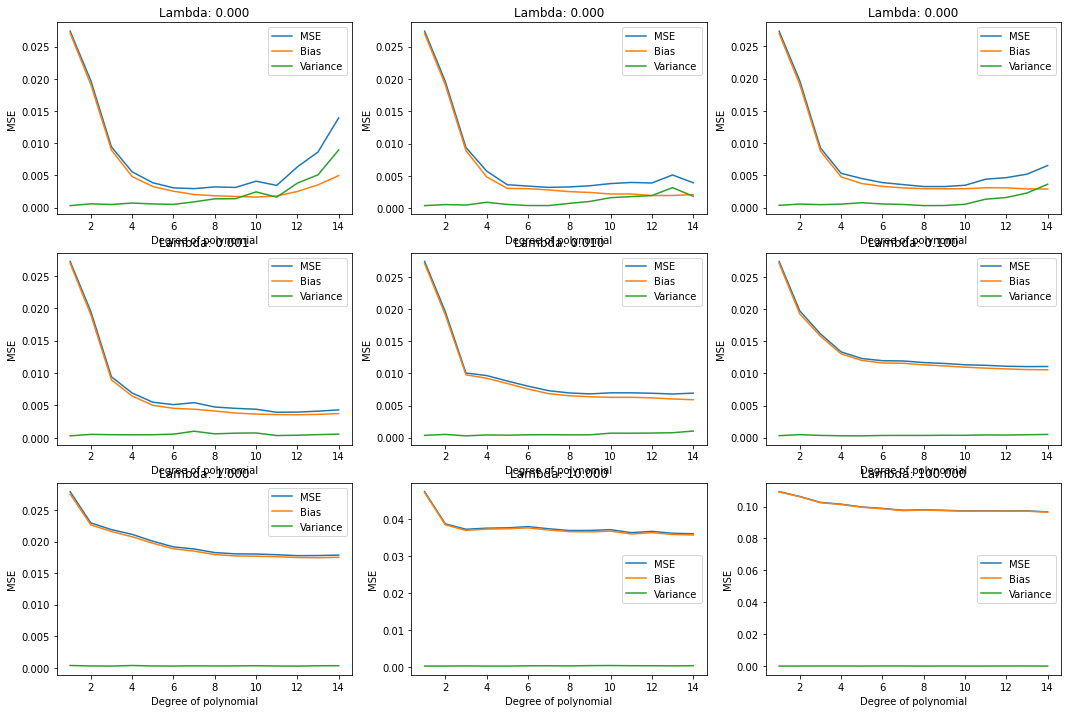

9

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (18,12))

for i, lam, ax_i in zip(range(9), lambdas, np.array(ax).flatten()):
  ax_i.plot(degrees, l_plt[0][i], label = 'MSE')
  ax_i.plot(degrees, l_plt[1][i], label = 'Bias')
  ax_i.plot(degrees, l_plt[2][i], label = 'Variance')

  ax_i.set_title("Lambda: "+f"{lam:.3f}")
  ax_i.set_xlabel("Degree of polynomial")
  ax_i.set_ylabel("MSE")
  #ax_i.set_yscale('log')
  ax_i.legend()

plt.show()

len(l_plt[0])



In [ ]:
l_plt[0]

[array([0.02738482, 0.01972138, 0.00943233, 0.00556603, 0.00387477,
        0.00308017, 0.0029582 , 0.00323051, 0.0031452 , 0.00411338,
        0.00346067, 0.00633134, 0.00864952, 0.01394734]),
 array([0.02738815, 0.01962292, 0.00938421, 0.00573785, 0.00362113,
        0.00340979, 0.00320921, 0.00327884, 0.003462  , 0.0037984 ,
        0.00397226, 0.00388781, 0.00513324, 0.00392946]),
 array([0.02736881, 0.01968118, 0.00927744, 0.00534218, 0.00453238,
        0.00389992, 0.00358985, 0.00328854, 0.00328543, 0.00348794,
        0.00442709, 0.00466894, 0.00520458, 0.00655127]),
 array([0.02725569, 0.01953695, 0.00942635, 0.00693153, 0.00550238,
        0.00513057, 0.00543707, 0.00476428, 0.00455637, 0.00441844,
        0.00394959, 0.00397609, 0.00412136, 0.00431846]),
 array([0.02739954, 0.01959451, 0.01005173, 0.00965591, 0.00881009,
        0.00801071, 0.00730424, 0.00695346, 0.00680405, 0.00696938,
        0.0069712 , 0.00690525, 0.00678901, 0.00692374]),
 array([0.0274194 , 0.01973095

### Part e): Introducing Real Data

With our codes functioning and having been tested properly on a simpler function we are now ready to look at real data. The data we are going to use is the Boston Housing data set.

The dataset contains 13 features, and 1 target named 'MEDV'. The goal of this exercise is to perform polynomial regression, using both OLS and Ridge Regression in order to find the model that best predicts the 'MEDV' target value. As before we assess the quality of a model by using the MSE and the R2 score.


Let's first separe the data contained in the Boston dataset from the targets, building two variables data and target, which contain the features and the targets of the dataset to be analysed. 

In [ ]:
#Main Libraries
import numpy as np
from random import random, seed
import pandas as pd

#Pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Scikitlearn
import sklearn as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.linear_model import Ridge  
from sklearn.datasets import load_boston

#tqdm for cycle updates
from tqdm import tqdm


from sklearn.datasets import load_boston
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning) 

boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['MEDV'] = boston_data.target

print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
target = boston_df['MEDV']

data = boston_df.drop(columns = 'MEDV')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


As suggested, the 13 features may have some correlation or some may not actually affect the final price of houses. Let's study the correlation between the variables inside the whole dataset, trying to exclude features that do not bring additional information which can be used for the classification.

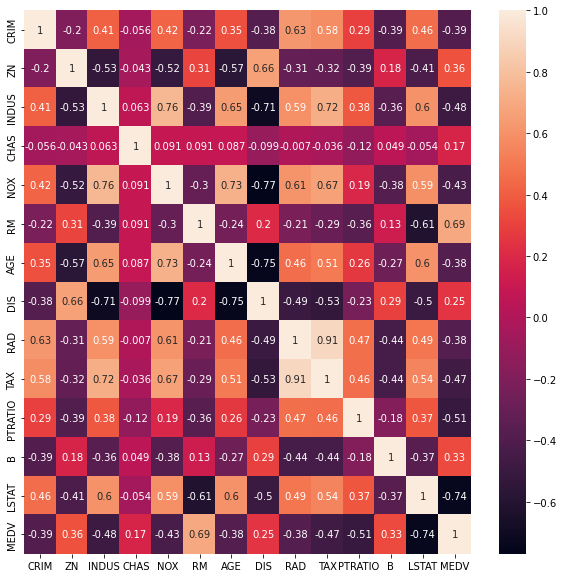

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
corr_matrix = boston_df.corr().round(3)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

For example the variables RAD and TAX are highly correlated (0.91). One of these two variables can then be removed to simpify the learning task.

        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000

Apparently, there is correlation between these two variables, even if it may not be apparent just from their origin. 

The same thing can be applied to the variables DIS and NOX, which have a -0.77 correlation coefficient. 

Moreover, we might be interested in a first moment in selecting only a couple of features that have a large impact on the final price of houses, to optimize the allocation of computational resources. (The complexity of design matrices increases very quickly with the number of features).
In particular, **we decide to choose as the first trial only the RM and LSTAT features**, which are highly correlated with the final price. 

Let's try now to visualize the correlations that the correlation matrix has highlighted. In green are shown the correlation between RM, LSTAT and the final price. In blue instead the correlations among features.


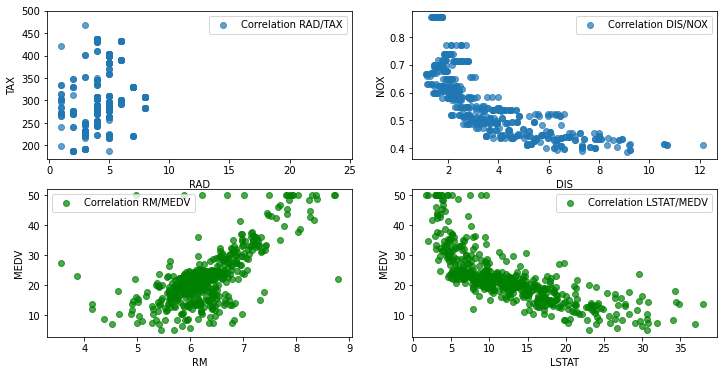

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))
ax = np.array(ax).flatten()

ax[0].scatter(boston_df.RAD,   boston_df.TAX , label = 'Correlation RAD/TAX', alpha = 0.7)
ax[0].set_ylim(170,500)
ax[1].scatter(boston_df.DIS,   boston_df.NOX , label = 'Correlation DIS/NOX', alpha = 0.7)
ax[2].scatter(boston_df.RM,    boston_df.MEDV, label = 'Correlation RM/MEDV',    color = 'g', alpha = 0.7)
ax[3].scatter(boston_df.LSTAT, boston_df.MEDV, label = 'Correlation LSTAT/MEDV', color = 'g', alpha = 0.7)

xlab = ['RAD', 'DIS', 'RM',  'LSTAT']
ylab = ['TAX', 'NOX', 'MEDV', 'MEDV']
for ax_i, xl, yl in zip(ax, xlab, ylab): 
  ax_i.legend()
  ax_i.set_xlabel(xl)
  ax_i.set_ylabel(yl)

plt.show()

The RAD/TAX correlation is now intuitive from the grah presented, but may be better visualised if we consider the *density* of the points present in the different TAX bins. 


More interestingly, we can notice that the final price (MEDV) increases almost linearly with the variable RM. Moreover, the values of MEDV seem to be truncated at 50. Such feature of the dataset may play a non-negligible role in the final comparison of results. On the other hand, the correlation between LSTAT and MEDV is not as linear as the previous one, but the trend and correlation between the variables is stille evident from the bottom-right figure. 


Let's consider now a reduced dataset, with only a couple of features, and let's see how the known algorithm perform with respect to the learning task.


### OLS

In [ ]:
from sklearn.model_selection import train_test_split

data_red = pd.DataFrame(data = [data.RM, data.LSTAT]).T

X_train, X_test, y_train, y_test = train_test_split(data_red, target, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                    )

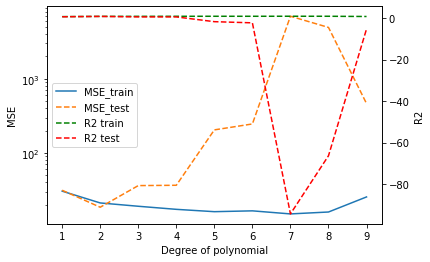

In [ ]:
from sklearn.metrics import mean_squared_error
scores = []
degree = range(1,10)
for deg in degree:
  
  X_train_design = PolynomialFeatures(deg).fit_transform(X_train)
  X_test_design  = PolynomialFeatures(deg).fit_transform(X_test)
  reg = LinearRegression().fit(X_train_design, y_train)

  scores.append([
                 mean_squared_error(y_train, reg.predict(X_train_design)), 
                 mean_squared_error(y_test,  reg.predict(X_test_design )),
                 reg.score(X_train_design, y_train ), 
                 reg.score(X_test_design , y_test ),  
                ]
               )

fig, ax = plt.subplots()
ax_t = ax.twinx()
l_MStr = ax.plot(degree, [sc[0] for sc in scores], label = 'MSE_train')
l_MSte = ax.plot(degree, [sc[1] for sc in scores], label = 'MSE_test', linestyle = 'dashed')
l_R2tr = ax_t.plot(degree, [sc[2] for sc in scores], label = 'R2 train', color = 'green', linestyle = 'dashed')
l_R2te = ax_t.plot(degree, [sc[3] for sc in scores], label = 'R2 test', color = 'red', linestyle = 'dashed')


ax.set_yscale('log')

# adding one legend for two axes
lns = l_MStr+l_MSte+l_R2tr+l_R2te
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=6)

ax.set_ylabel('MSE')
ax_t.set_ylabel('R2')
ax.set_xlabel('Degree of polynomial')

# ax.legend(loc = 6)
# ax_t.legend(loc = 10)
plt.show()


As shown, even the simple OLS algorithm stongly overfits while increasing the degree of the polynomials. The two selected features are then not able to describe the variability in the dataset and so the approach tried has to be discarded. Approaches considering more features must then be tried. 

The idea now is to calculate all the different features up to a certain polynomial degree and keep only those that are highly correlated with the result (i.e. corr > threshold). 
The goal of such technique is to reduce the number of features in the dataset while considering only the ones that represent most the variations in the dataset.

In the following cell, we try to consider different linear models changing the degree of the polynomials itself, but considering a fixed correlation threshold in the feature selection phase. 


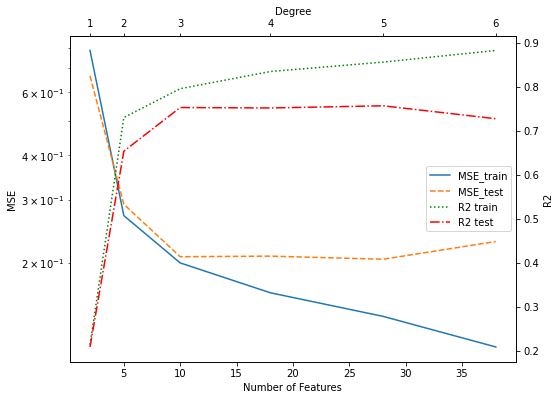

Varying Degree
MAX DEGREE:  6
correlation threshold:  0.7
min MSE_test:  0.20485228398952576


In [ ]:
import math

def corr(X, Y):
    return np.cov(X, Y)[0,1]/np.sqrt(np.var(X) * np.var(Y))

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                    )
y_train_sc = (y_train-y_train.mean())/y_train.std()
y_test_sc = (y_test-y_train.mean())/y_train.std()

n_bootstraps = 100
scores = []
n_features = []
maxdegree = 5  #go for 8 if you can

degree = range(1,7)
corr_threshold = 0.7
for deg in degree:
    Poly = PolynomialFeatures(deg)
    
    X_train_design_raw = Poly.fit_transform(X_train)
    X_test_design_raw  = Poly.fit_transform(X_test)
    feat_names_raw = Poly.get_feature_names(data.columns)
    
    scaler = StandardScaler()
    scaler.fit(X_train_design_raw)
    X_train_des_raw_sc = scaler.transform(X_train_design_raw)
    X_test_des_raw_sc = scaler.transform(X_test_design_raw)
    feat_rhos_raw = []
    for i in range(1, X_train_des_raw_sc.shape[1]):
        feat_rhos_raw.append(corr(y_train_sc, X_train_des_raw_sc[:,i]))
    
    X_train_design = []
    X_test_design = []
    feat_names_rhos = []
    
    count_features = 0
    for i, rho in enumerate(feat_rhos_raw):
        if abs(rho) > corr_threshold:
            count_features += 1
            X_train_design.append(X_train_des_raw_sc[:,i])
            X_test_design.append(X_test_des_raw_sc[:,i])
            feat_names_rhos.append([feat_names_raw[i], rho])
            
    X_train_design = np.array(X_train_design).T
    X_test_design = np.array(X_test_design).T
    
    if count_features > 0:
        scores_boot = []
        for i in range(n_bootstraps):
            X_train_boot, y_train_boot = resample(X_train_design, y_train_sc)
            reg = LinearRegression(fit_intercept = False).fit(X_train_boot, y_train_boot ) #fit_intercept = False as data are already centered! 
            scores_boot.append([
                     mean_squared_error(y_train_boot, reg.predict(X_train_boot)), 
                     mean_squared_error(y_test_sc,  reg.predict(X_test_design )),
                     reg.score(X_train_boot, y_train_boot ), 
                     reg.score(X_test_design , y_test_sc ),  
                    ]
                   )
        
        scores.append(np.mean(scores_boot, axis=0))
        n_features.append(count_features)
    else:
        print("ERROR: FEATURES = 0")
    
    if count_features > X_train_design.shape[0]:
        print("ERROR: TOO MANY FEATURES - SURELY OVERFITTING")
    
    # print(deg, count_features, scores[len(scores)-1][1])
    # for f in feat_names_rhos:
    #     print(f)



fig, ax = plt.subplots(figsize = (8,6))
ax_t = ax.twinx()
l_MStr = ax.plot(n_features, [sc[0] for sc in scores], label = 'MSE_train')
l_MSte = ax.plot(n_features, [sc[1] for sc in scores], label = 'MSE_test', linestyle = 'dashed')
l_R2tr = ax_t.plot(n_features, [sc[2] for sc in scores], label = 'R2 train', color = 'green', linestyle = 'dotted')
l_R2te = ax_t.plot(n_features, [sc[3] for sc in scores], label = 'R2 test', color = 'red', linestyle = 'dashdot')

ax.set_yscale('log')
# adding one legend for two axes
lns = l_MStr+l_MSte+l_R2tr+l_R2te
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5)

ax.set_ylabel('MSE')
ax_t.set_ylabel('R2')
ax.set_xlabel('Number of Features')


secax = ax.secondary_xaxis('top')
secax.set_xlabel('Degree')
secax.set_xticks(n_features)
secax.set_xticklabels([str(i) for i in degree])
# plt.rc('xtick',labelsize=12)
# plt.rc('ytick',labelsize=12)


# ax_t.xaxis.set_ticks_position('top')
# ax_t.set_xlabel("Degree")

# ax.legend(loc = 6)
# ax_t.legend(loc = 10)
plt.savefig("MSER2 Boston - 6Degree - 07 correlation.pdf")#, bbok_inches = 'tight')
plt.show()

print("Varying Degree")
print("MAX DEGREE: ",  max(degree))
print("correlation threshold: ", corr_threshold)
print("min MSE_test: ", min([sc[1] for sc in scores]))

The MSEs show a clear overfitting trend from a certain point on. Such trend is related to the increasing degree of the polynomial considered. The model becomes more and more complicated, and the variability of the data in the training set is explained with a too-high precision, which leads to the overfitting trend shown in the test MSE. 



On the other hand, the following cell is dedicated to the inverse problem. Sticking to the correlation threshold technique, here we try instead  to fix the degree of the polynomials fitted and we try to vary the threshold itseld, considering then how the accuracy indicators vary. 

As expected, we notice that increasing the correlation threshold leads to a reduction in the number of features kept in the training phase. 

Varying Threshold
MAX DEGREE:  6
min MSE_test:  0.18820991355189404


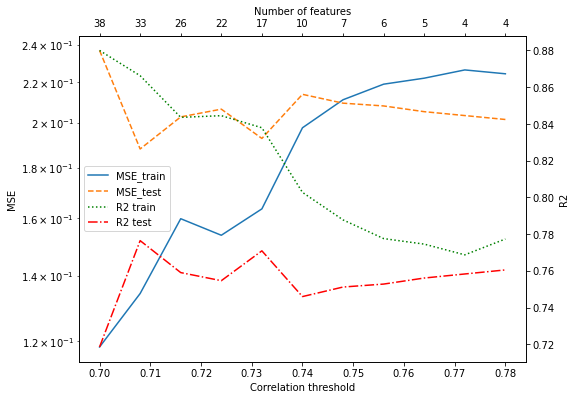

In [ ]:
def corr(X, Y):
    return np.cov(X, Y)[0,1]/np.sqrt(np.var(X) * np.var(Y))

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                    )

n_bootstraps = 20
scores = []
n_features = []
maxdegree = 6
degree = range(1,maxdegree+1)
corr_thresholds = np.linspace(0.7, 0.78, 10+1)

Poly = PolynomialFeatures(maxdegree)
X_train_design_raw = Poly.fit_transform(X_train)
X_test_design_raw  = Poly.fit_transform(X_test)
feat_names_raw = Poly.get_feature_names(data.columns)

scalerX = StandardScaler()
scalerX.fit(X_train_design_raw)
X_train_des_raw_sc = scalerX.transform(X_train_design_raw)
X_test_des_raw_sc = scalerX.transform(X_test_design_raw)

y_train_sc = (y_train-y_train.mean())/y_train.std()
y_test_sc = (y_test-y_train.mean())/y_train.std()

rhos = np.zeros(X_train_des_raw_sc.shape[1]-1)
for i in range(1, X_train_des_raw_sc.shape[1]):
    rhos[i-1] = corr(y_train_sc, X_train_des_raw_sc[:,i])
    
for corr_thr in corr_thresholds:
    
    X_train_design = []
    X_test_design = []
    feat_names_rhos = []
    
    count_features = 0
    for i, rho in enumerate(rhos):
        if abs(rho) > corr_thr:
            X_train_design.append(X_train_des_raw_sc[:,i])
            X_test_design.append(X_test_des_raw_sc[:,i])
            feat_names_rhos.append([rho, feat_names_raw[i]])
            count_features += 1
            
    X_train_design = np.array(X_train_design).T
    X_test_design = np.array(X_test_design).T
    
    #print(corr_thr, count_features)
    # for f in feat_names_rhos:
    #     print(f)
    
    if count_features > 0:
        scores_boot = []
        for i in range(n_bootstraps):
            X_train_boot, y_train_boot = resample(X_train_design, y_train_sc)
            reg = LinearRegression().fit(X_train_boot, y_train_boot)
            scores_boot.append([
                     mean_squared_error(y_train_boot, reg.predict(X_train_boot)), 
                     mean_squared_error(y_test_sc,  reg.predict(X_test_design )),
                     reg.score(X_train_boot, y_train_boot ), 
                     reg.score(X_test_design , y_test_sc ),  
                    ]
                   )
    else:
        print("ERROR: FEATURES = 0, with correlation threshold of", corr_thr)
    
    scores.append(np.mean(scores_boot, axis=0))
    n_features.append(count_features)
    if count_features > X_train_design.shape[0]:
        print("ERROR: TOO MANY FEATURES - SURELY OVERFITTING")

fig, ax = plt.subplots(figsize = (8,6))
ax_t = ax.twinx()
l_MStr = ax.plot(corr_thresholds, [sc[0] for sc in scores], label = 'MSE_train')
l_MSte = ax.plot(corr_thresholds, [sc[1] for sc in scores], label = 'MSE_test', linestyle = 'dashed')
l_R2tr = ax_t.plot(corr_thresholds, [sc[2] for sc in scores], label = 'R2 train', color = 'green', linestyle = 'dotted')
l_R2te = ax_t.plot(corr_thresholds, [sc[3] for sc in scores], label = 'R2 test', color = 'red', linestyle = 'dashdot')

ax.set_yscale('log')
# adding one legend for two axes
lns = l_MStr+l_MSte+l_R2tr+l_R2te
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=6)

ax.set_ylabel('MSE')
ax_t.set_ylabel('R2')
ax.set_xlabel('Correlation threshold')

secax = ax.secondary_xaxis('top')
secax.set_xlabel('Number of features')
secax.set_xticks(corr_thresholds)
secax.set_xticklabels(n_features)

print("Varying Threshold")
print("MAX DEGREE: ", maxdegree)
print("min MSE_test: ", min([sc[1] for sc in scores]))
plt.savefig("MSE 6fixedDegree 0.7-0.8 correlation.pdf")
plt.show()

### Ridge

In [ ]:
def corr(X, Y):
    return np.cov(X, Y)[0,1]/np.sqrt(np.var(X) * np.var(Y))

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                    )

Poly = PolynomialFeatures(maxdegree)
X_train_design_raw = Poly.fit_transform(X_train)
X_test_design_raw  = Poly.fit_transform(X_test)
feat_names_raw = Poly.get_feature_names(data.columns)

scalerX = StandardScaler()
scalerX.fit(X_train_design_raw)
X_train_des_raw_sc = scalerX.transform(X_train_design_raw)
X_test_des_raw_sc = scalerX.transform(X_test_design_raw)

y_train_sc = (y_train-y_train.mean())/y_train.std()
y_test_sc = (y_test-y_train.mean())/y_train.std()

rhos = np.zeros(X_train_des_raw_sc.shape[1]-1)
for i in range(1, X_train_des_raw_sc.shape[1]):
    rhos[i-1] = corr(y_train_sc, X_train_des_raw_sc[:,i])
    
#choose the most important features
X_train_design = []
X_test_design = []
feat_names_rhos = []

n_features = 0
for i, rho in enumerate(rhos):
    if abs(rho) > corr_threshold:
        X_train_design.append(X_train_des_raw_sc[:,i])
        X_test_design.append(X_test_des_raw_sc[:,i])
        feat_names_rhos.append([rho, feat_names_raw[i]])
        n_features += 1

X_train_design = np.array(X_train_design).T
X_test_design = np.array(X_test_design).T

# for f in feat_names_rhos:
#         print(f)


n_bootstraps = 50
scores = []
maxdegree = 6
lambdas = np.logspace(-5, 3, 20)
corr_threshold = 0.7


if n_features > 0:
    for lam in lambdas:
        scores_boot = []
        for i in range(n_bootstraps):
            X_train_boot, y_train_boot = resample(X_train_design, y_train_sc)
            reg = Ridge(lam).fit(X_train_boot, y_train_boot)
            scores_boot.append([
                     mean_squared_error(y_train_boot, reg.predict(X_train_boot)), 
                     mean_squared_error(y_test_sc,  reg.predict(X_test_design )),
                     reg.score(X_train_boot, y_train_boot ), 
                     reg.score(X_test_design , y_test_sc ),  
                    ]
                   )
        scores.append(np.mean(scores_boot, axis=0))
    
else:
        print("ERROR: FEATURES = 0, with correlation threshold of", corr_threshold)
if n_features > X_train_design.shape[0]:
        print("ERROR: TOO MANY FEATURES - SURELY OVERFITTING")
    



Ridge: fixed threshold and degree
MAX DEGREE:  6
correlation threshold:  0.7
features:  38
min MSE_test:  0.1903506640131884
Max R2_test:  0.29177021917873697
Best lambda 2.976351441631313


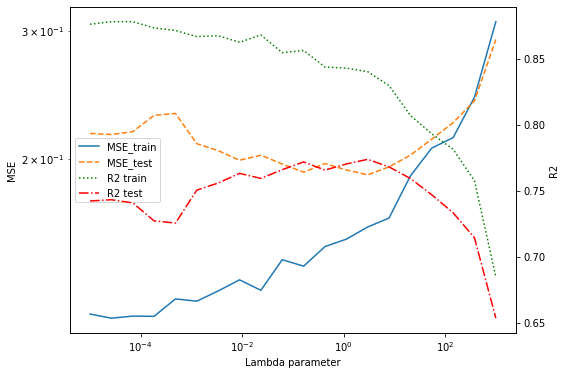

In [ ]:

fig, ax = plt.subplots( figsize=(8,6))
ax_t = ax.twinx()
l_MStr = ax.plot(lambdas, [sc[0] for sc in scores], label = 'MSE_train'    )
l_MSte = ax.plot(lambdas, [sc[1] for sc in scores], label = 'MSE_test' , linestyle = 'dashed')
l_R2tr = ax_t.plot(lambdas, [sc[2] for sc in scores], label = 'R2 train', color = 'green', linestyle = 'dotted')
l_R2te = ax_t.plot(lambdas, [sc[3] for sc in scores], label = 'R2 test', color = 'red', linestyle = 'dashdot')

ax.set_yscale('log')
ax.set_xscale('log')
# adding one legend for two axes
lns = l_MStr+l_MSte+l_R2tr+l_R2te
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=6)

ax.set_ylabel('MSE')
ax_t.set_ylabel('R2')
ax.set_xlabel('Lambda parameter')


print("Ridge: fixed threshold and degree")
print("MAX DEGREE: ", maxdegree)
print("correlation threshold: ", corr_threshold)
print("features: ", n_features)
print("min MSE_test: ", min([sc[1] for sc in scores]))
print("Max R2_test: ", max([sc[1] for sc in scores]))
print("Best lambda", lambdas[np.argmin([sc[1] for sc in scores])])

plt.savefig("RidgeRegressionvaryingLambda.pdf")
plt.show()

# PCA

Adding PCA to OLS

Guys.... PCA is a dimensionality reduction technique. In this case, it would make more sense to use it on the design matrix itself, and not on the initial dataframe. 
The aim of it is to reduce the effective dimension - using linear transformation. 

It has really a scarce sense using PCA, then building the design matrix and then again reducing the dimension using the correlation threshold we introduced before. 
It should be the other way around, so, without considering in this case any correlation threshold (it's already done by the PCA itself in a sense), we consider the design matrix with no restrictions and we apply PCA afterwards, to reduce the number of features considered. 

In [ ]:
  from sklearn.decomposition import PCA


def corr(X, Y):
    return np.cov(X, Y)[0,1]/np.sqrt(np.var(X) * np.var(Y))

X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )



y_train_sc = (y_train-y_train.mean())/y_train.std()
y_test_sc = (y_test-y_train.mean())/y_train.std()

n_bootstraps = 100
scores = []
n_features = []
maxdegree = 6
corr_thr = 0.35


Poly = PolynomialFeatures(maxdegree)
X_train_design_raw = Poly.fit_transform(X_train)

#feat_names_raw = Poly.get_feature_names(['x'+str(j) for j in range(1,i+1)])

scalerX = StandardScaler()
scalerX.fit(X_train_design_raw)
X_train_des_raw_sc = scalerX.transform(X_train_design_raw)
X_test_des_raw_sc = scalerX.transform(X_test_design_raw)


n_pcas = [i for i in range(1,80, 10)]
for n in n_pcas:


    pca = PCA(n)
    pca.fit(X_train_des_raw_sc)
    X_train_pca = pca.transform(X_train_des_raw_sc)
    X_test_pca = pca.transform(X_test_des_raw_sc)
    
    # rhos = np.zeros(X_train_des_raw_sc.shape[1]-1)
    # for j in range(1, X_train_des_raw_sc.shape[1]):
    #     rhos[j-1] = corr(y_train_sc, X_train_des_raw_sc[:,j])
        
    # X_train_design = []
    # X_test_design = []
    # feat_names_rhos = []
    
    # count_features = 0
    # for j, rho in enumerate(rhos):
    #     if abs(rho) > corr_thr:
    #         X_train_design.append(X_train_des_raw_sc[:,j])
    #         X_test_design.append(X_test_des_raw_sc[:,j])
    #         feat_names_rhos.append([rho, feat_names_raw[j]])
    #         count_features += 1
            
    # X_train_design = X_train_pca #np.array(X_train_design).T
    # X_test_design = X_test_pca #np.array(X_test_design).T
        
    #print(n, count_features)
    # for f in feat_names_rhos:
    #     print(f)
        

    scores_boot = []
    for i in range(n_bootstraps):
        X_train_boot, y_train_boot = resample(X_train_pca, y_train_sc)
        reg = LinearRegression().fit(X_train_boot, y_train_boot)
        scores_boot.append([
                  mean_squared_error(y_train_boot, reg.predict(X_train_boot)), 
                  mean_squared_error(y_test_sc,  reg.predict(X_test_pca)),
                  reg.score(X_train_boot, y_train_boot ), 
                  reg.score(X_test_pca , y_test_sc ),  
                ]
                )
    

    scores.append(np.mean(scores_boot, axis=0))
    n_features.append(X_test_pca.shape[1])
    # if count_features > X_train_design.shape[0]:
    #     print("ERROR: TOO MANY FEATURES - SURELY OVERFITTING")
 

0.22166619858098455
0.32353826711188083
0.5883478072723803
0.49198008075764343
0.6485718580534519
0.5798123410041556
0.7734771503846646
0.5269837191239715
0.8253438426108931
-0.1724030620333857
0.8698744992071414
-2.5105015066948337
0.9002976209023889
-0.47374742461939406
0.9091032126673286
-9.93535158089828
PCA
MAX DEGREE:  6
min MSE_test:  0.35382150531848455
Max R2 test 0.5798123410041556


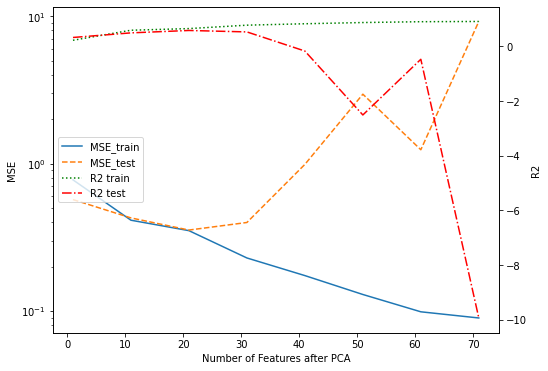

In [ ]:
fig, ax = plt.subplots( figsize=(8,6))
ax_t = ax.twinx()
l_MStr = ax.plot(n_pcas, [sc[0] for sc in scores], label = 'MSE_train',)
l_MSte = ax.plot(n_pcas, [sc[1] for sc in scores], label = 'MSE_test', linestyle = 'dashed')
l_R2tr = ax_t.plot(n_pcas, [sc[2] for sc in scores], label = 'R2 train', color = 'green', linestyle = 'dotted')
l_R2te = ax_t.plot(n_pcas, [sc[3] for sc in scores], label = 'R2 test', color = 'red', linestyle = 'dashdot')

#ax[0].set_yscale('log')
# adding one legend for two axes
lns = l_MStr+l_MSte+l_R2tr+l_R2te
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=6)

ax.set_yscale('log')
# ax_t.set_yscale('log')

ax.set_ylabel('MSE')
ax_t.set_ylabel('R2')

ax.set_xlabel('Number of Features after PCA')

# secax = ax.secondary_xaxis('top')
# secax.set_xlabel('Number of features')
# secax.set_xticks(n_pcas)
# secax.set_xticklabels(n_features)

print("PCA")
print("MAX DEGREE: ", maxdegree)
print("min MSE_test: ", min([sc[1] for sc in scores]))
  
plt.savefig("PCA true 100 bootstrap .pdf")

print("Max R2 test", max([sc[3] for sc in scores]))